In [69]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
import plotly.graph_objs as go
from plotly.offline import iplot
from collections import Counter
matplotlib.style.use('ggplot')
%matplotlib inline

In [70]:
df = pd.read_csv("contest_train_binary.csv")
df

,ID,TARGET,FEATURE_0,FEATURE_1,FEATURE_2,FEATURE_3,FEATURE_4,FEATURE_5,FEATURE_6,FEATURE_7,FEATURE_8,FEATURE_9,FEATURE_10,FEATURE_11,FEATURE_12,FEATURE_13,FEATURE_14,FEATURE_15,FEATURE_16,FEATURE_17,FEATURE_18,FEATURE_19,FEATURE_20,FEATURE_21,FEATURE_22,FEATURE_23,FEATURE_24,FEATURE_25,FEATURE_26,FEATURE_27,FEATURE_28,FEATURE_29,FEATURE_30,FEATURE_31,FEATURE_32,FEATURE_33,FEATURE_34,FEATURE_35,FEATURE_36,FEATURE_37,...,FEATURE_220,FEATURE_221,FEATURE_222,FEATURE_223,FEATURE_224,FEATURE_225,FEATURE_226,FEATURE_227,FEATURE_228,FEATURE_229,FEATURE_230,FEATURE_231,FEATURE_232,FEATURE_233,FEATURE_234,FEATURE_235,FEATURE_236,FEATURE_237,FEATURE_238,FEATURE_239,FEATURE_240,FEATURE_241,FEATURE_242,FEATURE_243,FEATURE_244,FEATURE_245,FEATURE_246,FEATURE_247,FEATURE_248,FEATURE_249,FEATURE_250,FEATURE_251,FEATURE_252,FEATURE_253,FEATURE_254,FEATURE_255,FEATURE_256,FEATURE_257,FEATURE_258,FEATURE_259
0,1053371037,1,2.0,2.0,0.0,0.0,0.0,0.0,0.0,-114.527812,-17.218055,0.0,0.0,0.0,25.257841,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.492541,0.0,3.770712,-2.165145,0.0,-11.508692,0.0,0.0,0.0,0.0,0.0,0.0,0.709990,-166.128241,16.497987,-109.953267,-10.257451,...,2.0,22.0,56.0,-18.199109,1.0,433.147718,4.0,52.0,55.724127,0.0,33.779127,0.0,48.382771,-6.547478,0.0,62.754784,111.843533,213.048521,20.0,18.0,225.386422,0.0,0.0,0.0,160.783415,0.0,2.0,0.0,19.0,0.0,39.0,2.0,223.118594,290.015143,1.0,1.0,0.0,1.0,2.0,2.0
1,76507184,0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,329.828334,NaN,3.0,2.0,1.0,767.317882,30.0,11.0,1.0,0.0,0.0,1.0,0.0,0.0,-1.779101,0.0,-27.718626,-2.046630,0.0,-48.533875,0.0,0.0,0.0,0.0,0.0,0.0,4198.421679,6935.032043,3326.119168,4750.740829,8171.976929,...,1.0,288.0,540.0,1573.705923,1.0,885.756703,104.0,230.0,349.871581,0.0,6367.475792,0.0,106.445674,6535.301751,0.0,429.122711,325.660562,720.583426,361.0,135.0,911.831620,0.0,81.0,1.0,485.233915,0.0,0.0,0.0,1.0,0.0,25.0,82.0,479.616045,611.651594,0.0,1.0,0.0,1.0,1.0,1.0
2,76753690,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.427338,-6.680747,0.0,0.0,0.0,1453.022898,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.042108,0.0,-0.090641,-1.499671,0.0,-6.227192,0.0,0.0,0.0,0.0,0.0,0.0,-89.245457,9.436363,0.792981,61.085481,4.367151,...,2.0,92.0,161.0,2.543405,1.0,504.081602,13.0,89.0,81.637348,0.0,13.527245,0.0,50.178073,29.679975,0.0,228.212833,173.897261,395.110199,28.0,15.0,343.967505,0.0,0.0,0.0,67.814125,0.0,0.0,0.0,78.0,0.0,119.0,0.0,352.268014,564.573421,1.0,1.0,0.0,1.0,1.0,1.0
3,1026167358,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,23.621397,36.659534,0.0,0.0,0.0,31.190091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.717799,0.0,4.728385,1.393742,0.0,97.362996,0.0,0.0,0.0,0.0,0.0,0.0,31.692737,-13.471019,-28.444859,18.306662,11.252959,...,2.0,66.0,95.0,74.923704,3.0,610.918525,0.0,5.0,15.496008,0.0,77.928861,0.0,-68.997270,-7.829144,0.0,86.471577,74.197509,129.144486,25.0,12.0,437.126266,0.0,0.0,0.0,-33.449029,0.0,0.0,0.0,0.0,0.0,1.0,0.0,410.524985,421.653876,1.0,0.0,0.0,1.0,2.0,2.0
4,7220095746,0,4.0,3.0,1.0,0.0,1.0,0.0,0.0,677.745861,NaN,3.0,2.0,1.0,525.617364,3.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,-11.515780,0.0,-3.293282,-12.724665,0.0,32.755535,0.0,0.0,0.0,0.0,0.0,0.0,903.748860,1979.278641,10935.990056,3591.990400,3421.519324,...,1.0,7.0,21.0,411.043807,8.0,587.200844,5.0,85.0,88.260674,0.0,3346.536049,0.0,166.360435,3489.936805,0.0,-41.518356,45.664366,60.847476,9.0,47.0,251.658361,0.0,0.0,0.0,427.417631,0.0,0.0,0.0,0.0,0.0,21.0,0.0,439.171356,476.189288,1.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24516,1152298722,1,7.0,2.0,0.0,0.0,0.0,0.0,0.0,-36.555841,-43.535029,0.0,0.0,0.0,18.848608,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.487541,0.0,-2.130000,-4.616539,0.0,-1.450508,0.0,0.0,0.0,0.0,0.0,0.0,-3.137834,30.852702,-53.554631,-58.138781,8.337391,...,1.0,105

In [71]:
df_test = pd.read_csv("contest_test.csv")

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24521 entries, 0 to 24520
Columns: 262 entries, ID to FEATURE_259
dtypes: float64(260), int64(2)
memory usage: 49.0 MB


In [73]:
columns = df.columns
columns

Index(['ID', 'TARGET', 'FEATURE_0', 'FEATURE_1', 'FEATURE_2', 'FEATURE_3',
       'FEATURE_4', 'FEATURE_5', 'FEATURE_6', 'FEATURE_7',
       ...
       'FEATURE_250', 'FEATURE_251', 'FEATURE_252', 'FEATURE_253',
       'FEATURE_254', 'FEATURE_255', 'FEATURE_256', 'FEATURE_257',
       'FEATURE_258', 'FEATURE_259'],
      dtype='object', length=262)

# EDA

In [74]:
def get_rain_categories(data, val):
    tmp = data.groupby('TARGET')[val].value_counts()
    return pd.DataFrame(data={'Number': tmp.values}, index=tmp.index).reset_index()

def plot_rain_bar(data_df, var, ytitle= 'Number of target',title= 'Number of target=1 and target=0 by {}'):
    dfY = data_df[data_df['TARGET']==1]
    dfN = data_df[data_df['TARGET']==0]
    print(dfY)

    traceY = go.Bar(
        x = dfY[var],y = dfY['Number'],
        name='target=1',
        marker=dict(color="Blue"),
        text=dfY['Number']
    )
    traceN = go.Bar(
        x = dfN[var],y = dfN['Number'],
        name='target=0',
        marker=dict(color="Red"),
        text=dfY['Number']
    )
    
    data = [traceY, traceN]
    layout = dict(title = title.format(var),
          xaxis = dict(title = var, showticklabels=True), 
          yaxis = dict(title = ytitle),
          hovermode = 'closest'
    )
    fig = dict(data=data, layout=layout)
   
    iplot(fig, filename='draw_trace')

In [75]:
def plot_num(df, col):
    g = sns.FacetGrid(df, col = "TARGET")
    g.map(sns.distplot, col, bins = 25)
    plt.show()

## Результат анализа

FEATURE_0, FEATURE_1, FEATURE_7, FEATURE_8, 12,13, 14, 26 имеет выбросы

FEATURE_2, FEATURE_4, 11, 15, 16, 17, 18, 19, 123, 131, 254, 255 - бинарный

FEATURE_3, 144, 249, 256 - const = 0

FEATURE_5, FEATURE_6, 140, 159 - бинарный, но в основном const

FEATURE_9, 10, 151, 152, 156, 157, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214. 218, 219, 220, 257, 258, 259 - категориальный

FEATURE_20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32,33, 34,35,36,37, 38,39, 40, 41, 42, 43,44,45, 46, 47 - непонятный

149 - 552 выброс; 150 - 2275; 153 - 3000; 198 все>100;

In [76]:
def detect_outliers(df,features):
    outlier_indices = []
    for c in features:
        Q1 = df[c].quantile(0.25)
        Q3 = df[c].quantile(0.75)
        IQR = Q3 - Q1
        outlier_step = IQR * 1.5
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['ID'], axis=1), df.TARGET, test_size=0.25, random_state=123, shuffle=df.TARGET)

In [78]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [79]:
y_test.size, y_train.size 

(6131, 18390)

In [80]:
y_train.value_counts()

0    14212
1     4178
Name: TARGET, dtype: int64

In [81]:
y_test.value_counts()

0    4659
1    1472
Name: TARGET, dtype: int64

# Удаление выбросов

In [82]:
ind = X_train[['TARGET', 'FEATURE_1']].loc[X_train['FEATURE_1'] >20].index
X_train_outliers = X_train.copy()
X_train_outliers = X_train_outliers.drop(ind,axis = 0).reset_index(drop = True)

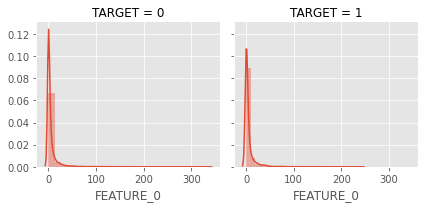

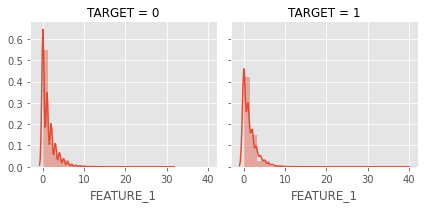

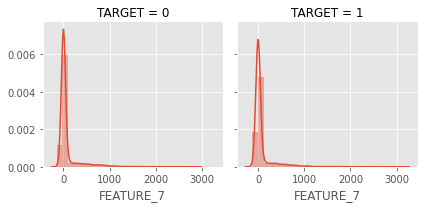

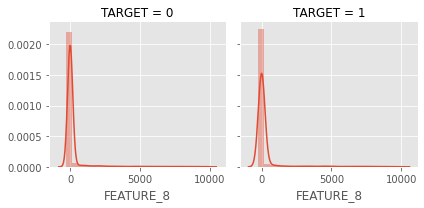

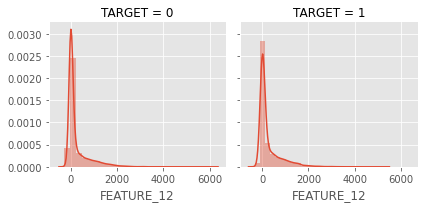

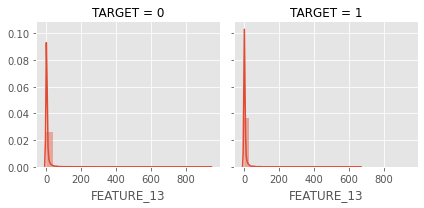

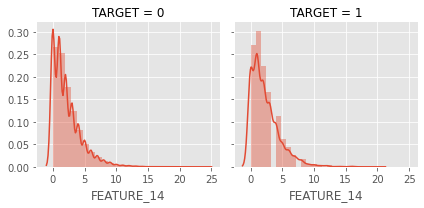

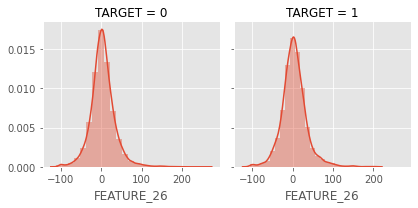

In [83]:
for n in ['FEATURE_0', 'FEATURE_1', 'FEATURE_7', 'FEATURE_8', 'FEATURE_12', 'FEATURE_13', 'FEATURE_14', 'FEATURE_26']:
    plot_num(X_train, n)

In [84]:
ind = X_train_outliers[['TARGET', 'FEATURE_149']].loc[X_train_outliers['FEATURE_149'] >200].index
X_train_outliers = X_train_outliers.drop(ind,axis = 0).reset_index(drop = True)

In [85]:
X_train_outliers[['TARGET', 'FEATURE_198']].loc[X_train_outliers['FEATURE_198'] >100]

,TARGET,FEATURE_198
8726,0,365.0
9648,0,219.0
14018,0,203.0


In [86]:
ind = X_train_outliers[['TARGET', 'FEATURE_198']].loc[X_train_outliers['FEATURE_198'] >100].index
X_train_outliers = X_train_outliers.drop(ind,axis = 0).reset_index(drop = True)

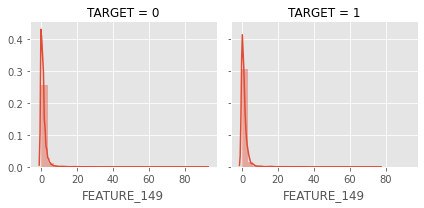

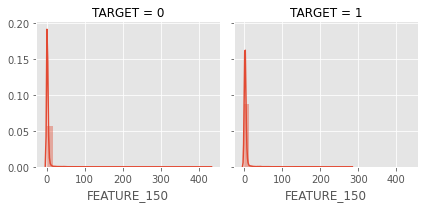

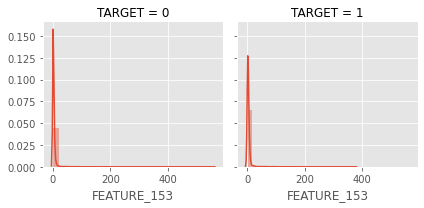

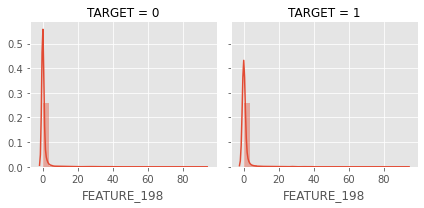

In [87]:
for n in ['FEATURE_149', 'FEATURE_150', 'FEATURE_153', 'FEATURE_198']:
    plot_num(X_train_outliers, n)

In [88]:
X_train_outliers

,TARGET,FEATURE_0,FEATURE_1,FEATURE_2,FEATURE_3,FEATURE_4,FEATURE_5,FEATURE_6,FEATURE_7,FEATURE_8,FEATURE_9,FEATURE_10,FEATURE_11,FEATURE_12,FEATURE_13,FEATURE_14,FEATURE_15,FEATURE_16,FEATURE_17,FEATURE_18,FEATURE_19,FEATURE_20,FEATURE_21,FEATURE_22,FEATURE_23,FEATURE_24,FEATURE_25,FEATURE_26,FEATURE_27,FEATURE_28,FEATURE_29,FEATURE_30,FEATURE_31,FEATURE_32,FEATURE_33,FEATURE_34,FEATURE_35,FEATURE_36,FEATURE_37,FEATURE_38,...,FEATURE_220,FEATURE_221,FEATURE_222,FEATURE_223,FEATURE_224,FEATURE_225,FEATURE_226,FEATURE_227,FEATURE_228,FEATURE_229,FEATURE_230,FEATURE_231,FEATURE_232,FEATURE_233,FEATURE_234,FEATURE_235,FEATURE_236,FEATURE_237,FEATURE_238,FEATURE_239,FEATURE_240,FEATURE_241,FEATURE_242,FEATURE_243,FEATURE_244,FEATURE_245,FEATURE_246,FEATURE_247,FEATURE_248,FEATURE_249,FEATURE_250,FEATURE_251,FEATURE_252,FEATURE_253,FEATURE_254,FEATURE_255,FEATURE_256,FEATURE_257,FEATURE_258,FEATURE_259
0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,40.576785,559.527334,3.0,1.0,0.0,168.055198,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,-19.313803,0.0,-90.957646,-21.590814,0.0,3.692101,0.0,0.0,0.0,0.0,0.0,0.0,4644.279746,5403.025617,5657.073520,7819.609494,7488.158858,5611.412336,...,2.0,20.0,14.0,1410.339869,1.0,851.886810,35.0,234.0,276.490930,0.0,6925.098871,0.0,276.991086,7318.780359,0.0,276.844904,187.214742,494.703412,68.0,49.0,572.788895,0.0,0.0,0.0,559.726188,0.0,59.0,0.0,0.0,0.0,18.0,59.0,538.714468,627.562193,0.0,1.0,0.0,1.0,1.0,1.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-16.143374,46.707790,0.0,0.0,0.0,-4.808740,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,7.699818,0.0,-0.015198,0.689224,0.0,-31.038013,0.0,0.0,0.0,0.0,0.0,0.0,1.023001,105.255697,-56.288547,46.704566,50.954724,27.992165,...,2.0,16.0,36.0,-139.165348,1.0,59.167204,1.0,43.0,19.791961,0.0,-67.187553,0.0,43.267993,37.719870,0.0,35.596600,86.983272,92.076430,15.0,30.0,90.488563,0.0,0.0,0.0,-0.755138,0.0,0.0,0.0,2.0,0.0,0.0,0.0,79.690343,70.957184,1.0,1.0,0.0,1.0,1.0,2.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-19.771377,16.947837,0.0,0.0,0.0,498.225815,5.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.882338,0.0,-96.358858,-102.874192,0.0,-37.983430,0.0,0.0,0.0,0.0,0.0,0.0,10.014679,25.972535,-16.723438,-1.656616,14.475151,12.355469,...,2.0,123.0,178.0,984.757652,1.0,441.131059,2.0,58.0,81.196131,0.0,-91.247895,0.0,494.617207,570.520900,0.0,301.674510,291.050975,480.913525,25.0,33.0,356.572479,0.0,0.0,0.0,453.685221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,388.195181,435.950093,1.0,0.0,0.0,1.0,1.0,1.0
3,0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,-19.548218,28.120353,0.0,0.0,0.0,126.310635,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.845039,0.0,44.306610,52.064583,0.0,-0.688096,0.0,0.0,0.0,0.0,0.0,0.0,-76.963637,65.832342,54.541602,44.902842,9.142860,130.006980,...,1.0,376.0,720.0,270.626182,0.0,705.120731,4.0,187.0,165.048125,0.0,-43.357925,0.0,560.167056,542.961813,0.0,1460.284604,1252.822986,2750.305295,142.0,275.0,667.279899,0.0,0.0,4.0,414.407307,0.0,0.0,0.0,0.0,0.0,25.0,4.0,623.677432,640.949069,1.0,1.0,0.0,1.0,1.0,1.0
4,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1343.432696,3391.868477,3.0,1.0,1.0,469.902976,4.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,-26.408569,0.0,56.939937,-10.397938,0.0,24.390110,0.0,0.0,0.0,0.0,0.0,0.0,45.885696,78.061939,160.746985,568.065800,1361.140419,630.287300,...,1.0,55.0,56.0,416.581362,1.0,510.809904,0.0,57.0,58.319958,0.0,862.673495,0.0,336.413821,1118.585364,0.0,114.276552,100.964141,147.797909,18.0,7.0,1293.763381,0.0,274.0,107.0,77.150136,0.0,10.0,34.0,0.0,0.0,1.0,425.0,85.914419,543.206220,1.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18378,1,11.0,2.0,0.0,0.0,0.0,0.0,0.0,14.045156,-49.303819,0.0,0.0,0.0,45.488266,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.589380,0.0,0.297236,1.922194,0.0,10.971244,0.0,0.0,0.0,0.0,0.0,0.0,18.498890,1.482036,19.180786,7.336150,

# Заполнение пропусков

In [89]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [90]:
mis = missing_data(X_train_outliers)

In [91]:
mis

,Total,Percent
FEATURE_189,18147,98.716205
FEATURE_194,12914,70.249687
FEATURE_190,12847,69.885220
FEATURE_191,11438,62.220530
FEATURE_192,9741,52.989175
...,...,...
FEATURE_158,0,0.000000
FEATURE_157,0,0.000000
FEATURE_156,0,0.000000
FEATURE_155,0,0.000000


In [92]:
mis.loc[mis.Percent != 0]

,Total,Percent
FEATURE_189,18147,98.716205
FEATURE_194,12914,70.249687
FEATURE_190,12847,69.885220
FEATURE_191,11438,62.220530
FEATURE_192,9741,52.989175
FEATURE_193,9394,51.101561
FEATURE_187,8854,48.164065
FEATURE_71,2245,12.212370
FEATURE_73,2245,12.212370
FEATURE_195,2113,11.494315


In [93]:
mis_test = missing_data(df_test)

In [94]:
a = mis_test.reset_index().loc[mis_test.reset_index().Percent != 0]
b = mis.reset_index().loc[mis.reset_index().Percent != 0]

In [95]:
pd.merge(a, b, how='outer', on='index')

,index,Total_x,Percent_x,Total_y,Percent_y
0,FEATURE_189,9274,97.785744,18147.0,98.716205
1,FEATURE_190,6201,65.383804,12847.0,69.885220
2,FEATURE_194,5727,60.385913,12914.0,70.249687
3,FEATURE_191,5658,59.658372,11438.0,62.220530
4,FEATURE_192,4925,51.929566,9741.0,52.989175
5,FEATURE_193,4695,49.504429,9394.0,51.101561
6,FEATURE_187,4386,46.246310,8854.0,48.164065
7,FEATURE_151,852,8.983551,1807.0,9.829734
8,FEATURE_152,852,8.983551,1807.0,9.829734
9,FEATURE_153,852,8.983551,1807.0,9.829734


In [96]:
X_train_outliers_miss = X_train_outliers.copy()

In [97]:
X_train_outliers_miss.drop(['FEATURE_189'], axis=1, inplace=True)

# Удаление столбцов и преобразование категориальных переменных

In [98]:
categorical_bin = ['FEATURE_2', 'FEATURE_4', 'FEATURE_11', 'FEATURE_15', 'FEATURE_16', 'FEATURE_17', 'FEATURE_18', 'FEATURE_19',
               'FEATURE_123', 'FEATURE_131', 'FEATURE_254', 'FEATURE_255']

In [99]:
categorical_mul = ['FEATURE_9', 'FEATURE_10', 'FEATURE_151', 'FEATURE_152', 'FEATURE_156', 'FEATURE_157', 'FEATURE_203', 'FEATURE_204',
                  'FEATURE_205', 'FEATURE_206', 'FEATURE_207', 'FEATURE_208', 'FEATURE_209', 'FEATURE_210', 'FEATURE_211', 'FEATURE_212',
                  'FEATURE_213', 'FEATURE_214', 'FEATURE_218', 'FEATURE_219', 'FEATURE_220', 'FEATURE_257', 'FEATURE_258', 'FEATURE_259']

In [100]:
X_train_outliers_drop = X_train_outliers_miss.copy()

In [101]:
X_train_outliers_drop

,TARGET,FEATURE_0,FEATURE_1,FEATURE_2,FEATURE_3,FEATURE_4,FEATURE_5,FEATURE_6,FEATURE_7,FEATURE_8,FEATURE_9,FEATURE_10,FEATURE_11,FEATURE_12,FEATURE_13,FEATURE_14,FEATURE_15,FEATURE_16,FEATURE_17,FEATURE_18,FEATURE_19,FEATURE_20,FEATURE_21,FEATURE_22,FEATURE_23,FEATURE_24,FEATURE_25,FEATURE_26,FEATURE_27,FEATURE_28,FEATURE_29,FEATURE_30,FEATURE_31,FEATURE_32,FEATURE_33,FEATURE_34,FEATURE_35,FEATURE_36,FEATURE_37,FEATURE_38,...,FEATURE_220,FEATURE_221,FEATURE_222,FEATURE_223,FEATURE_224,FEATURE_225,FEATURE_226,FEATURE_227,FEATURE_228,FEATURE_229,FEATURE_230,FEATURE_231,FEATURE_232,FEATURE_233,FEATURE_234,FEATURE_235,FEATURE_236,FEATURE_237,FEATURE_238,FEATURE_239,FEATURE_240,FEATURE_241,FEATURE_242,FEATURE_243,FEATURE_244,FEATURE_245,FEATURE_246,FEATURE_247,FEATURE_248,FEATURE_249,FEATURE_250,FEATURE_251,FEATURE_252,FEATURE_253,FEATURE_254,FEATURE_255,FEATURE_256,FEATURE_257,FEATURE_258,FEATURE_259
0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,40.576785,559.527334,3.0,1.0,0.0,168.055198,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,-19.313803,0.0,-90.957646,-21.590814,0.0,3.692101,0.0,0.0,0.0,0.0,0.0,0.0,4644.279746,5403.025617,5657.073520,7819.609494,7488.158858,5611.412336,...,2.0,20.0,14.0,1410.339869,1.0,851.886810,35.0,234.0,276.490930,0.0,6925.098871,0.0,276.991086,7318.780359,0.0,276.844904,187.214742,494.703412,68.0,49.0,572.788895,0.0,0.0,0.0,559.726188,0.0,59.0,0.0,0.0,0.0,18.0,59.0,538.714468,627.562193,0.0,1.0,0.0,1.0,1.0,1.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-16.143374,46.707790,0.0,0.0,0.0,-4.808740,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,7.699818,0.0,-0.015198,0.689224,0.0,-31.038013,0.0,0.0,0.0,0.0,0.0,0.0,1.023001,105.255697,-56.288547,46.704566,50.954724,27.992165,...,2.0,16.0,36.0,-139.165348,1.0,59.167204,1.0,43.0,19.791961,0.0,-67.187553,0.0,43.267993,37.719870,0.0,35.596600,86.983272,92.076430,15.0,30.0,90.488563,0.0,0.0,0.0,-0.755138,0.0,0.0,0.0,2.0,0.0,0.0,0.0,79.690343,70.957184,1.0,1.0,0.0,1.0,1.0,2.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-19.771377,16.947837,0.0,0.0,0.0,498.225815,5.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.882338,0.0,-96.358858,-102.874192,0.0,-37.983430,0.0,0.0,0.0,0.0,0.0,0.0,10.014679,25.972535,-16.723438,-1.656616,14.475151,12.355469,...,2.0,123.0,178.0,984.757652,1.0,441.131059,2.0,58.0,81.196131,0.0,-91.247895,0.0,494.617207,570.520900,0.0,301.674510,291.050975,480.913525,25.0,33.0,356.572479,0.0,0.0,0.0,453.685221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,388.195181,435.950093,1.0,0.0,0.0,1.0,1.0,1.0
3,0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,-19.548218,28.120353,0.0,0.0,0.0,126.310635,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.845039,0.0,44.306610,52.064583,0.0,-0.688096,0.0,0.0,0.0,0.0,0.0,0.0,-76.963637,65.832342,54.541602,44.902842,9.142860,130.006980,...,1.0,376.0,720.0,270.626182,0.0,705.120731,4.0,187.0,165.048125,0.0,-43.357925,0.0,560.167056,542.961813,0.0,1460.284604,1252.822986,2750.305295,142.0,275.0,667.279899,0.0,0.0,4.0,414.407307,0.0,0.0,0.0,0.0,0.0,25.0,4.0,623.677432,640.949069,1.0,1.0,0.0,1.0,1.0,1.0
4,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1343.432696,3391.868477,3.0,1.0,1.0,469.902976,4.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,-26.408569,0.0,56.939937,-10.397938,0.0,24.390110,0.0,0.0,0.0,0.0,0.0,0.0,45.885696,78.061939,160.746985,568.065800,1361.140419,630.287300,...,1.0,55.0,56.0,416.581362,1.0,510.809904,0.0,57.0,58.319958,0.0,862.673495,0.0,336.413821,1118.585364,0.0,114.276552,100.964141,147.797909,18.0,7.0,1293.763381,0.0,274.0,107.0,77.150136,0.0,10.0,34.0,0.0,0.0,1.0,425.0,85.914419,543.206220,1.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18378,1,11.0,2.0,0.0,0.0,0.0,0.0,0.0,14.045156,-49.303819,0.0,0.0,0.0,45.488266,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.589380,0.0,0.297236,1.922194,0.0,10.971244,0.0,0.0,0.0,0.0,0.0,0.0,18.498890,1.482036,19.180786,7.336150,

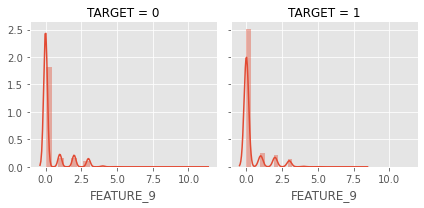

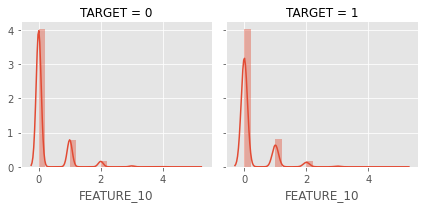

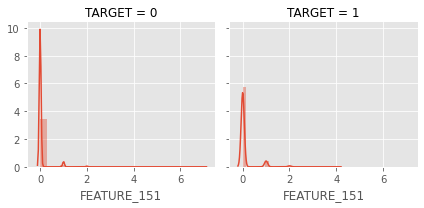

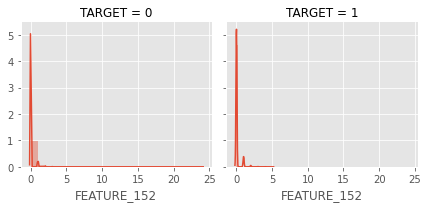

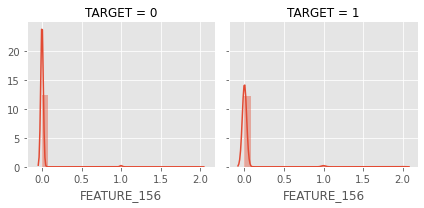

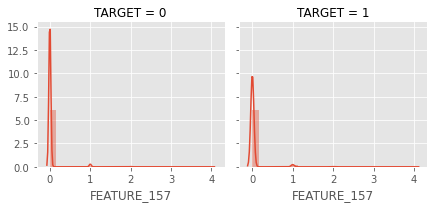

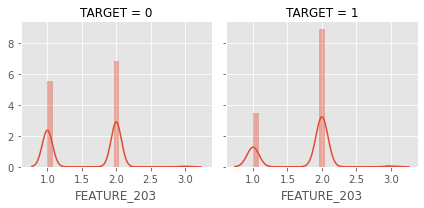

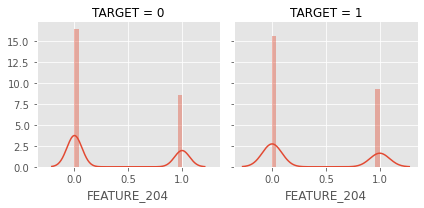

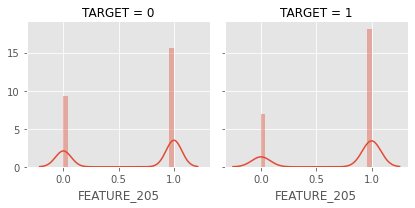

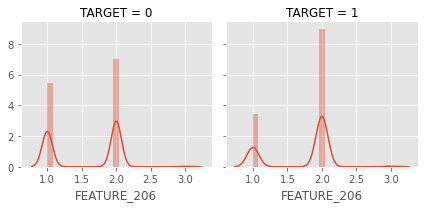

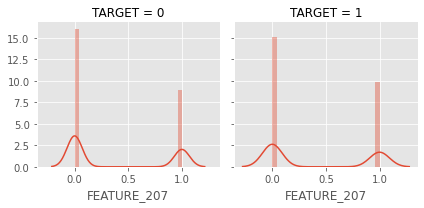

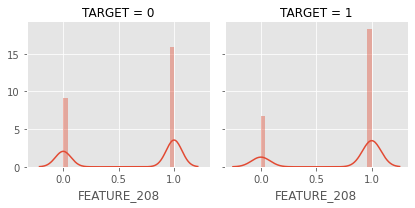

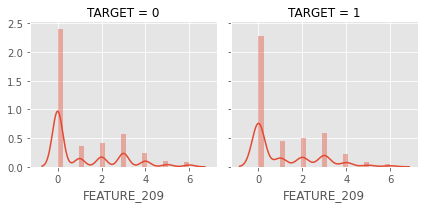

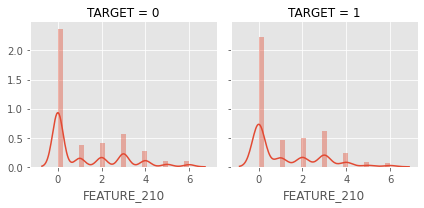

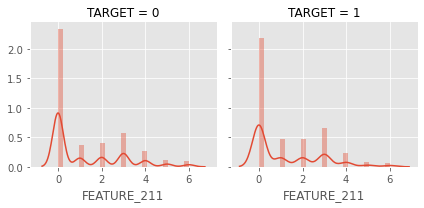

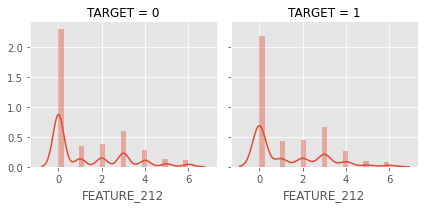

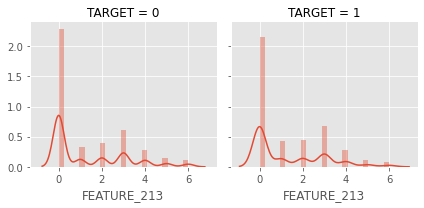

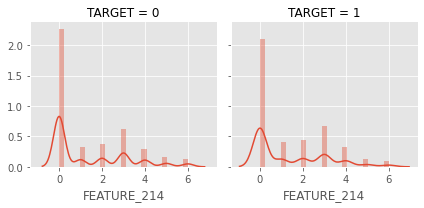

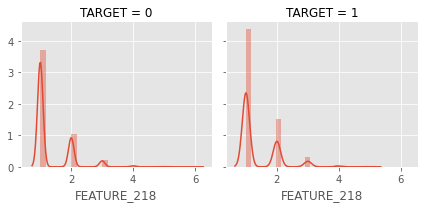

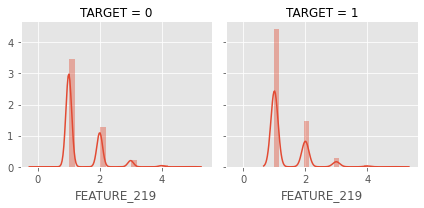

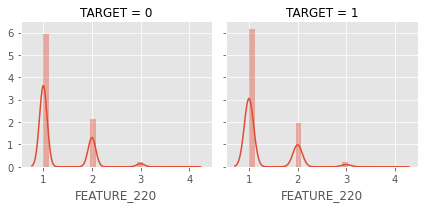

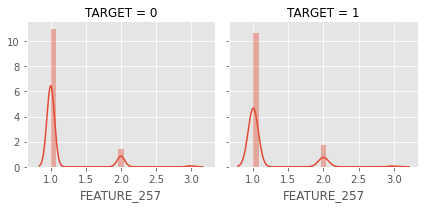

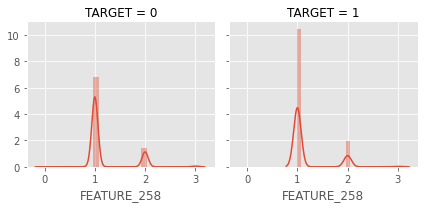

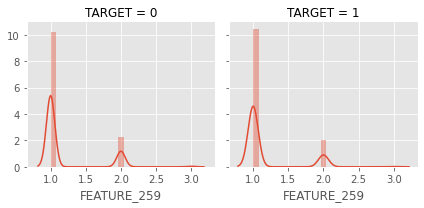

In [102]:
for c in categorical_mul:
    plot_num(X_train_outliers_drop, c)

In [103]:
X_train_outliers_drop['FEATURE_152'].value_counts()

0.0     15549
1.0       885
2.0       111
3.0        19
4.0         8
6.0         2
5.0         1
24.0        1
Name: FEATURE_152, dtype: int64

In [104]:
df_test.FEATURE_152.value_counts()

0.0     7960
1.0      555
2.0      100
3.0       14
42.0       1
6.0        1
4.0        1
Name: FEATURE_152, dtype: int64

In [105]:
X_train_outliers_drop[['TARGET', 'FEATURE_152']].loc[(X_train_outliers['FEATURE_152'] == 24) | (X_train_outliers['FEATURE_152'] == 5)].index

Int64Index([6497, 6737], dtype='int64')

In [106]:
X_train_outliers_drop.drop(X_train_outliers_drop[['TARGET', 'FEATURE_152']].loc[(X_train_outliers['FEATURE_152'] == 24) | (X_train_outliers['FEATURE_152'] == 5)].index, axis=0, inplace=True)

In [107]:
X_train_outliers_drop.reset_index(drop=True, inplace=True)

In [108]:
X_train_outliers_drop.shape

(18381, 260)

In [109]:
X_train_outliers['FEATURE_256'].value_counts()

0.0    18383
Name: FEATURE_256, dtype: int64

In [110]:
drop_columns = ['FEATURE_3', 'FEATURE_144', 'FEATURE_249', 'FEATURE_256']

In [111]:
df_test.shape

(9484, 261)

In [112]:
for i in drop_columns:
    print(X_train_outliers_drop[i].value_counts())
    print(df_test[i].value_counts())

0.0    18381
Name: FEATURE_3, dtype: int64
0.0    9484
Name: FEATURE_3, dtype: int64
0.0    18381
Name: FEATURE_144, dtype: int64
0.000000     9391
0.150000        4
6.133333        2
3.883333        2
4.133334        1
             ... 
11.983333       1
1.866667        1
0.950000        1
4.433333        1
1.166667        1
Name: FEATURE_144, Length: 89, dtype: int64
0.0    18381
Name: FEATURE_249, dtype: int64
0.0    9484
Name: FEATURE_249, dtype: int64
0.0    18381
Name: FEATURE_256, dtype: int64
0.0    7244
1.0    1967
Name: FEATURE_256, dtype: int64


In [113]:
X_train_outliers_drop.drop(columns=drop_columns, axis=1, inplace=True)

In [114]:
X_train_outliers_drop['FEATURE_159'].value_counts()

0.0    18381
Name: FEATURE_159, dtype: int64

In [115]:
X_train_outliers_drop[['TARGET', 'FEATURE_140']].loc[X_train_outliers['FEATURE_140'] == 1].value_counts()

TARGET  FEATURE_140
0       0.0            47
        1.0            25
1       0.0            15
        1.0             5
dtype: int64

In [116]:
drop_columns_2 = ['FEATURE_5', 'FEATURE_6', 'FEATURE_140', 'FEATURE_159']
X_train_outliers_drop.drop(columns=drop_columns_2, axis=1, inplace=True)

In [117]:
missing_data(X_train_outliers_drop[categorical_bin])

,Total,Percent
FEATURE_131,210,1.142484
FEATURE_123,210,1.142484
FEATURE_255,0,0.000000
FEATURE_254,0,0.000000
FEATURE_19,0,0.000000
FEATURE_18,0,0.000000
FEATURE_17,0,0.000000
FEATURE_16,0,0.000000
FEATURE_15,0,0.000000
FEATURE_11,0,0.000000


In [118]:
missing_data(X_train_outliers_drop[categorical_mul])

,Total,Percent
FEATURE_151,1807,9.830804
FEATURE_152,1807,9.830804
FEATURE_204,101,0.549480
FEATURE_205,100,0.544040
FEATURE_203,97,0.527719
FEATURE_207,92,0.500517
FEATURE_208,91,0.495076
FEATURE_206,88,0.478755
FEATURE_209,29,0.157772
FEATURE_210,25,0.136010


In [119]:
cat_cols = categorical_bin + categorical_mul
cat_cols

['FEATURE_2',
 'FEATURE_4',
 'FEATURE_11',
 'FEATURE_15',
 'FEATURE_16',
 'FEATURE_17',
 'FEATURE_18',
 'FEATURE_19',
 'FEATURE_123',
 'FEATURE_131',
 'FEATURE_254',
 'FEATURE_255',
 'FEATURE_9',
 'FEATURE_10',
 'FEATURE_151',
 'FEATURE_152',
 'FEATURE_156',
 'FEATURE_157',
 'FEATURE_203',
 'FEATURE_204',
 'FEATURE_205',
 'FEATURE_206',
 'FEATURE_207',
 'FEATURE_208',
 'FEATURE_209',
 'FEATURE_210',
 'FEATURE_211',
 'FEATURE_212',
 'FEATURE_213',
 'FEATURE_214',
 'FEATURE_218',
 'FEATURE_219',
 'FEATURE_220',
 'FEATURE_257',
 'FEATURE_258',
 'FEATURE_259']

In [120]:
X_train

,TARGET,FEATURE_0,FEATURE_1,FEATURE_2,FEATURE_3,FEATURE_4,FEATURE_5,FEATURE_6,FEATURE_7,FEATURE_8,FEATURE_9,FEATURE_10,FEATURE_11,FEATURE_12,FEATURE_13,FEATURE_14,FEATURE_15,FEATURE_16,FEATURE_17,FEATURE_18,FEATURE_19,FEATURE_20,FEATURE_21,FEATURE_22,FEATURE_23,FEATURE_24,FEATURE_25,FEATURE_26,FEATURE_27,FEATURE_28,FEATURE_29,FEATURE_30,FEATURE_31,FEATURE_32,FEATURE_33,FEATURE_34,FEATURE_35,FEATURE_36,FEATURE_37,FEATURE_38,...,FEATURE_220,FEATURE_221,FEATURE_222,FEATURE_223,FEATURE_224,FEATURE_225,FEATURE_226,FEATURE_227,FEATURE_228,FEATURE_229,FEATURE_230,FEATURE_231,FEATURE_232,FEATURE_233,FEATURE_234,FEATURE_235,FEATURE_236,FEATURE_237,FEATURE_238,FEATURE_239,FEATURE_240,FEATURE_241,FEATURE_242,FEATURE_243,FEATURE_244,FEATURE_245,FEATURE_246,FEATURE_247,FEATURE_248,FEATURE_249,FEATURE_250,FEATURE_251,FEATURE_252,FEATURE_253,FEATURE_254,FEATURE_255,FEATURE_256,FEATURE_257,FEATURE_258,FEATURE_259
0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,40.576785,559.527334,3.0,1.0,0.0,168.055198,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,-19.313803,0.0,-90.957646,-21.590814,0.0,3.692101,0.0,0.0,0.0,0.0,0.0,0.0,4644.279746,5403.025617,5657.073520,7819.609494,7488.158858,5611.412336,...,2.0,20.0,14.0,1410.339869,1.0,851.886810,35.0,234.0,276.490930,0.0,6925.098871,0.0,276.991086,7318.780359,0.0,276.844904,187.214742,494.703412,68.0,49.0,572.788895,0.0,0.0,0.0,559.726188,0.0,59.0,0.0,0.0,0.0,18.0,59.0,538.714468,627.562193,0.0,1.0,0.0,1.0,1.0,1.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-16.143374,46.707790,0.0,0.0,0.0,-4.808740,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,7.699818,0.0,-0.015198,0.689224,0.0,-31.038013,0.0,0.0,0.0,0.0,0.0,0.0,1.023001,105.255697,-56.288547,46.704566,50.954724,27.992165,...,2.0,16.0,36.0,-139.165348,1.0,59.167204,1.0,43.0,19.791961,0.0,-67.187553,0.0,43.267993,37.719870,0.0,35.596600,86.983272,92.076430,15.0,30.0,90.488563,0.0,0.0,0.0,-0.755138,0.0,0.0,0.0,2.0,0.0,0.0,0.0,79.690343,70.957184,1.0,1.0,0.0,1.0,1.0,2.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-19.771377,16.947837,0.0,0.0,0.0,498.225815,5.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.882338,0.0,-96.358858,-102.874192,0.0,-37.983430,0.0,0.0,0.0,0.0,0.0,0.0,10.014679,25.972535,-16.723438,-1.656616,14.475151,12.355469,...,2.0,123.0,178.0,984.757652,1.0,441.131059,2.0,58.0,81.196131,0.0,-91.247895,0.0,494.617207,570.520900,0.0,301.674510,291.050975,480.913525,25.0,33.0,356.572479,0.0,0.0,0.0,453.685221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,388.195181,435.950093,1.0,0.0,0.0,1.0,1.0,1.0
3,0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,-19.548218,28.120353,0.0,0.0,0.0,126.310635,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.845039,0.0,44.306610,52.064583,0.0,-0.688096,0.0,0.0,0.0,0.0,0.0,0.0,-76.963637,65.832342,54.541602,44.902842,9.142860,130.006980,...,1.0,376.0,720.0,270.626182,0.0,705.120731,4.0,187.0,165.048125,0.0,-43.357925,0.0,560.167056,542.961813,0.0,1460.284604,1252.822986,2750.305295,142.0,275.0,667.279899,0.0,0.0,4.0,414.407307,0.0,0.0,0.0,0.0,0.0,25.0,4.0,623.677432,640.949069,1.0,1.0,0.0,1.0,1.0,1.0
4,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1343.432696,3391.868477,3.0,1.0,1.0,469.902976,4.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,-26.408569,0.0,56.939937,-10.397938,0.0,24.390110,0.0,0.0,0.0,0.0,0.0,0.0,45.885696,78.061939,160.746985,568.065800,1361.140419,630.287300,...,1.0,55.0,56.0,416.581362,1.0,510.809904,0.0,57.0,58.319958,0.0,862.673495,0.0,336.413821,1118.585364,0.0,114.276552,100.964141,147.797909,18.0,7.0,1293.763381,0.0,274.0,107.0,77.150136,0.0,10.0,34.0,0.0,0.0,1.0,425.0,85.914419,543.206220,1.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18385,1,11.0,2.0,0.0,0.0,0.0,0.0,0.0,14.045156,-49.303819,0.0,0.0,0.0,45.488266,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.589380,0.0,0.297236,1.922194,0.0,10.971244,0.0,0.0,0.0,0.0,0.0,0.0,18.498890,1.482036,19.180786,7.336150,

In [121]:
X_train_outliers_drop[cat_cols] = X_train_outliers_drop[cat_cols].fillna('NA').astype(str)
X_test[cat_cols] = X_test[cat_cols].fillna('NA').astype(str)
df_test[cat_cols] = df_test[cat_cols].fillna('NA').astype(str)

In [122]:
X_train_outliers_drop

,TARGET,FEATURE_0,FEATURE_1,FEATURE_2,FEATURE_4,FEATURE_7,FEATURE_8,FEATURE_9,FEATURE_10,FEATURE_11,FEATURE_12,FEATURE_13,FEATURE_14,FEATURE_15,FEATURE_16,FEATURE_17,FEATURE_18,FEATURE_19,FEATURE_20,FEATURE_21,FEATURE_22,FEATURE_23,FEATURE_24,FEATURE_25,FEATURE_26,FEATURE_27,FEATURE_28,FEATURE_29,FEATURE_30,FEATURE_31,FEATURE_32,FEATURE_33,FEATURE_34,FEATURE_35,FEATURE_36,FEATURE_37,FEATURE_38,FEATURE_39,FEATURE_40,FEATURE_41,...,FEATURE_218,FEATURE_219,FEATURE_220,FEATURE_221,FEATURE_222,FEATURE_223,FEATURE_224,FEATURE_225,FEATURE_226,FEATURE_227,FEATURE_228,FEATURE_229,FEATURE_230,FEATURE_231,FEATURE_232,FEATURE_233,FEATURE_234,FEATURE_235,FEATURE_236,FEATURE_237,FEATURE_238,FEATURE_239,FEATURE_240,FEATURE_241,FEATURE_242,FEATURE_243,FEATURE_244,FEATURE_245,FEATURE_246,FEATURE_247,FEATURE_248,FEATURE_250,FEATURE_251,FEATURE_252,FEATURE_253,FEATURE_254,FEATURE_255,FEATURE_257,FEATURE_258,FEATURE_259
0,0,0.0,0.0,1.0,0.0,40.576785,559.527334,3.0,1.0,0.0,168.055198,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,-19.313803,0.0,-90.957646,-21.590814,0.0,3.692101,0.0,0.0,0.0,0.0,0.0,0.0,4644.279746,5403.025617,5657.073520,7819.609494,7488.158858,5611.412336,928.0,604.0,0.0,...,1.0,2.0,2.0,20.0,14.0,1410.339869,1.0,851.886810,35.0,234.0,276.490930,0.0,6925.098871,0.0,276.991086,7318.780359,0.0,276.844904,187.214742,494.703412,68.0,49.0,572.788895,0.0,0.0,0.0,559.726188,0.0,59.0,0.0,0.0,18.0,59.0,538.714468,627.562193,0.0,1.0,1.0,1.0,1.0
1,0,0.0,0.0,0.0,0.0,-16.143374,46.707790,0.0,0.0,0.0,-4.808740,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,7.699818,0.0,-0.015198,0.689224,0.0,-31.038013,0.0,0.0,0.0,0.0,0.0,0.0,1.023001,105.255697,-56.288547,46.704566,50.954724,27.992165,0.0,0.0,0.0,...,1.0,1.0,2.0,16.0,36.0,-139.165348,1.0,59.167204,1.0,43.0,19.791961,0.0,-67.187553,0.0,43.267993,37.719870,0.0,35.596600,86.983272,92.076430,15.0,30.0,90.488563,0.0,0.0,0.0,-0.755138,0.0,0.0,0.0,2.0,0.0,0.0,79.690343,70.957184,1.0,1.0,1.0,1.0,2.0
2,1,0.0,0.0,0.0,0.0,-19.771377,16.947837,0.0,0.0,0.0,498.225815,5.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.882338,0.0,-96.358858,-102.874192,0.0,-37.983430,0.0,0.0,0.0,0.0,0.0,0.0,10.014679,25.972535,-16.723438,-1.656616,14.475151,12.355469,0.0,0.0,0.0,...,1.0,1.0,2.0,123.0,178.0,984.757652,1.0,441.131059,2.0,58.0,81.196131,0.0,-91.247895,0.0,494.617207,570.520900,0.0,301.674510,291.050975,480.913525,25.0,33.0,356.572479,0.0,0.0,0.0,453.685221,0.0,0.0,0.0,0.0,0.0,0.0,388.195181,435.950093,1.0,0.0,1.0,1.0,1.0
3,0,3.0,3.0,0.0,0.0,-19.548218,28.120353,0.0,0.0,0.0,126.310635,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.845039,0.0,44.306610,52.064583,0.0,-0.688096,0.0,0.0,0.0,0.0,0.0,0.0,-76.963637,65.832342,54.541602,44.902842,9.142860,130.006980,0.0,0.0,0.0,...,2.0,2.0,1.0,376.0,720.0,270.626182,0.0,705.120731,4.0,187.0,165.048125,0.0,-43.357925,0.0,560.167056,542.961813,0.0,1460.284604,1252.822986,2750.305295,142.0,275.0,667.279899,0.0,0.0,4.0,414.407307,0.0,0.0,0.0,0.0,25.0,4.0,623.677432,640.949069,1.0,1.0,1.0,1.0,1.0
4,0,0.0,0.0,0.0,1.0,1343.432696,3391.868477,3.0,1.0,1.0,469.902976,4.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,-26.408569,0.0,56.939937,-10.397938,0.0,24.390110,0.0,0.0,0.0,0.0,0.0,0.0,45.885696,78.061939,160.746985,568.065800,1361.140419,630.287300,0.0,0.0,0.0,...,1.0,2.0,1.0,55.0,56.0,416.581362,1.0,510.809904,0.0,57.0,58.319958,0.0,862.673495,0.0,336.413821,1118.585364,0.0,114.276552,100.964141,147.797909,18.0,7.0,1293.763381,0.0,274.0,107.0,77.150136,0.0,10.0,34.0,0.0,1.0,425.0,85.914419,543.206220,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18376,1,11.0,2.0,0.0,0.0,14.045156,-49.303819,0.0,0.0,0.0,45.488266,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.589380,0.0,0.297236,1.922194,0.0,10.971244,0.0,0.0,0.0,0.0,0.0,0.0,18.498890,1.482036,19.180786,7.336150,-13.8

In [123]:
pip install category_encoders

In [124]:
from category_encoders.one_hot import OneHotEncoder
OHE_encoder = OneHotEncoder(handle_unknown='value')
OHE_encoder.fit(X_train_outliers_drop[cat_cols])
X_train_cat = OHE_encoder.transform(X_train_outliers_drop[cat_cols])
X_test_cat = OHE_encoder.transform(X_test[cat_cols])

In [125]:
X_test

,TARGET,FEATURE_0,FEATURE_1,FEATURE_2,FEATURE_3,FEATURE_4,FEATURE_5,FEATURE_6,FEATURE_7,FEATURE_8,FEATURE_9,FEATURE_10,FEATURE_11,FEATURE_12,FEATURE_13,FEATURE_14,FEATURE_15,FEATURE_16,FEATURE_17,FEATURE_18,FEATURE_19,FEATURE_20,FEATURE_21,FEATURE_22,FEATURE_23,FEATURE_24,FEATURE_25,FEATURE_26,FEATURE_27,FEATURE_28,FEATURE_29,FEATURE_30,FEATURE_31,FEATURE_32,FEATURE_33,FEATURE_34,FEATURE_35,FEATURE_36,FEATURE_37,FEATURE_38,...,FEATURE_220,FEATURE_221,FEATURE_222,FEATURE_223,FEATURE_224,FEATURE_225,FEATURE_226,FEATURE_227,FEATURE_228,FEATURE_229,FEATURE_230,FEATURE_231,FEATURE_232,FEATURE_233,FEATURE_234,FEATURE_235,FEATURE_236,FEATURE_237,FEATURE_238,FEATURE_239,FEATURE_240,FEATURE_241,FEATURE_242,FEATURE_243,FEATURE_244,FEATURE_245,FEATURE_246,FEATURE_247,FEATURE_248,FEATURE_249,FEATURE_250,FEATURE_251,FEATURE_252,FEATURE_253,FEATURE_254,FEATURE_255,FEATURE_256,FEATURE_257,FEATURE_258,FEATURE_259
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-12.863721,24.194417,0.0,0.0,0.0,-64.724457,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.649515,0.0,3.126787,1.094622,0.0,-32.025429,0.0,0.0,0.0,0.0,0.0,0.0,36.916030,33.877874,7.104968,-29.935252,13.462992,-15.192998,...,1.0,18.0,15.0,-13.093121,7.0,210.947005,0.0,35.0,19.071090,0.0,-3.553334,0.0,-25.760764,-7.845326,0.0,51.199694,11.161913,0.085257,2.0,7.0,225.182543,0.0,0.0,0.0,107.958881,0.0,0.0,0.0,0.0,0.0,31.0,0.0,187.195215,342.272368,1.0,1.0,0.0,1.0,1.0,1.0
1,0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,23.980349,-9.812086,0.0,0.0,0.0,953.199771,7.0,6.0,1.0,1.0,0.0,1.0,0.0,0.0,-8.500579,200.0,-51.142118,-39.892650,7.4,46.403025,0.0,0.0,0.0,0.0,0.0,0.0,-18.011475,3297.557867,2857.546302,2120.673057,4327.320457,2704.183985,...,1.0,249.0,466.0,1662.854150,1.0,540.846061,14.0,255.0,277.810445,0.0,3052.332255,298.0,1038.717240,3956.406916,174.0,671.782436,667.428176,1230.158020,448.0,338.0,491.927510,3.0,1.0,1.0,432.185588,3.0,0.0,0.0,0.0,0.0,32.0,2.0,472.523246,494.595072,1.0,1.0,0.0,1.0,1.0,1.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.485872,6.007976,0.0,0.0,0.0,20.097412,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.662038,0.0,1.674377,4.313701,0.0,-71.364057,0.0,0.0,0.0,0.0,0.0,0.0,80.279979,19.153225,82.792212,-7.040068,-20.048449,72.976276,...,1.0,15.0,14.0,17.004337,2.0,352.661477,5.0,39.0,59.378934,0.0,-37.851594,0.0,38.254604,-106.059529,0.0,-0.616155,-37.467271,-95.119312,36.0,2.0,138.431308,0.0,0.0,0.0,9.511553,0.0,0.0,0.0,13.0,0.0,0.0,0.0,-29.014538,132.398913,1.0,1.0,0.0,1.0,2.0,1.0
3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.076050,11.793815,0.0,0.0,0.0,47.648914,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.074133,0.0,-9.241478,1.259279,0.0,-26.159477,0.0,0.0,0.0,0.0,0.0,0.0,29.892730,54.857752,69.719762,45.071692,-15.785116,-8.958328,...,1.0,22.0,72.0,41.099672,0.0,74.826583,1.0,77.0,78.954185,0.0,-96.266322,0.0,8.356469,-11.529713,0.0,106.508567,200.973453,168.900642,1.0,13.0,46.064339,0.0,0.0,0.0,0.797420,0.0,0.0,0.0,1.0,0.0,0.0,0.0,41.597768,-14.467731,0.0,0.0,0.0,1.0,1.0,1.0
4,0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,11.965393,-28.178890,0.0,0.0,0.0,814.389937,7.0,8.0,1.0,0.0,0.0,1.0,0.0,0.0,204.231396,0.0,15.202596,18.720771,0.0,36.966841,0.0,0.0,0.0,0.0,0.0,0.0,-17.349511,2207.863023,18.314624,-135.678876,24.993713,63.016238,...,1.0,47.0,145.0,366.970246,1.0,331.424964,29.0,222.0,252.589110,0.0,18.707690,0.0,480.002488,578.619090,0.0,178.470441,240.692729,386.647082,108.0,139.0,235.697809,0.0,0.0,0.0,175.947680,0.0,0.0,0.0,11.0,0.0,0.0,0.0,132.162161,163.423663,0.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6126,0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.705253,56.847413,0.0,0.0,0.0,1518.180755,12.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,-2.785539,0.0,-66.717012,-66.657309,0.0,-8.652991,0.0,0.0,0.0,0.0,0.0,0.0,28.412237,-0.893001,29.904801,4.090262,59.733382,-74.359355,...,

In [126]:
df_test_cat = OHE_encoder.transform(df_test[cat_cols])

In [127]:
X_train_cat

,FEATURE_2_1,FEATURE_2_2,FEATURE_4_1,FEATURE_4_2,FEATURE_11_1,FEATURE_11_2,FEATURE_15_1,FEATURE_15_2,FEATURE_16_1,FEATURE_16_2,FEATURE_17_1,FEATURE_17_2,FEATURE_18_1,FEATURE_18_2,FEATURE_19_1,FEATURE_19_2,FEATURE_123_1,FEATURE_123_2,FEATURE_123_3,FEATURE_131_1,FEATURE_131_2,FEATURE_131_3,FEATURE_254_1,FEATURE_254_2,FEATURE_255_1,FEATURE_255_2,FEATURE_9_1,FEATURE_9_2,FEATURE_9_3,FEATURE_9_4,FEATURE_9_5,FEATURE_9_6,FEATURE_9_7,FEATURE_9_8,FEATURE_9_9,FEATURE_9_10,FEATURE_10_1,FEATURE_10_2,FEATURE_10_3,FEATURE_10_4,...,FEATURE_213_2,FEATURE_213_3,FEATURE_213_4,FEATURE_213_5,FEATURE_213_6,FEATURE_213_7,FEATURE_213_8,FEATURE_214_1,FEATURE_214_2,FEATURE_214_3,FEATURE_214_4,FEATURE_214_5,FEATURE_214_6,FEATURE_214_7,FEATURE_218_1,FEATURE_218_2,FEATURE_218_3,FEATURE_218_4,FEATURE_218_5,FEATURE_218_6,FEATURE_219_1,FEATURE_219_2,FEATURE_219_3,FEATURE_219_4,FEATURE_219_5,FEATURE_219_6,FEATURE_220_1,FEATURE_220_2,FEATURE_220_3,FEATURE_220_4,FEATURE_257_1,FEATURE_257_2,FEATURE_257_3,FEATURE_258_1,FEATURE_258_2,FEATURE_258_3,FEATURE_258_4,FEATURE_259_1,FEATURE_259_2,FEATURE_259_3
0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0
1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0
2,0,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0
3,0,1,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0
4,0,1,0,1,0,1,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18376,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0
18377,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0
18378,0,1,0,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0
18379,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0


# заполнение целочисленных пропусков

In [128]:
num_cols = X_train_outliers_drop.drop(columns=cat_cols + ['TARGET']).columns

In [129]:
X_train_outliers_drop[num_cols]

,FEATURE_0,FEATURE_1,FEATURE_7,FEATURE_8,FEATURE_12,FEATURE_13,FEATURE_14,FEATURE_20,FEATURE_21,FEATURE_22,FEATURE_23,FEATURE_24,FEATURE_25,FEATURE_26,FEATURE_27,FEATURE_28,FEATURE_29,FEATURE_30,FEATURE_31,FEATURE_32,FEATURE_33,FEATURE_34,FEATURE_35,FEATURE_36,FEATURE_37,FEATURE_38,FEATURE_39,FEATURE_40,FEATURE_41,FEATURE_42,FEATURE_43,FEATURE_44,FEATURE_45,FEATURE_46,FEATURE_47,FEATURE_48,FEATURE_49,FEATURE_50,FEATURE_51,FEATURE_52,...,FEATURE_198,FEATURE_199,FEATURE_200,FEATURE_201,FEATURE_202,FEATURE_215,FEATURE_216,FEATURE_217,FEATURE_221,FEATURE_222,FEATURE_223,FEATURE_224,FEATURE_225,FEATURE_226,FEATURE_227,FEATURE_228,FEATURE_229,FEATURE_230,FEATURE_231,FEATURE_232,FEATURE_233,FEATURE_234,FEATURE_235,FEATURE_236,FEATURE_237,FEATURE_238,FEATURE_239,FEATURE_240,FEATURE_241,FEATURE_242,FEATURE_243,FEATURE_244,FEATURE_245,FEATURE_246,FEATURE_247,FEATURE_248,FEATURE_250,FEATURE_251,FEATURE_252,FEATURE_253
0,0.0,0.0,40.576785,559.527334,168.055198,6.0,2.0,0.0,-19.313803,0.0,-90.957646,-21.590814,0.0,3.692101,0.0,0.0,0.0,0.0,0.0,0.0,4644.279746,5403.025617,5657.073520,7819.609494,7488.158858,5611.412336,928.0,604.0,0.0,0.0,0.0,0.0,386.123842,467.128837,268.707381,505.973028,245.806552,62.716177,4996.750210,5856.833639,...,0.0,9.0,0.0,0.0,0.0,55.0,71.0,1283.704652,20.0,14.0,1410.339869,1.0,851.886810,35.0,234.0,276.490930,0.0,6925.098871,0.0,276.991086,7318.780359,0.0,276.844904,187.214742,494.703412,68.0,49.0,572.788895,0.0,0.0,0.0,559.726188,0.0,59.0,0.0,0.0,18.0,59.0,538.714468,627.562193
1,0.0,0.0,-16.143374,46.707790,-4.808740,1.0,2.0,0.0,7.699818,0.0,-0.015198,0.689224,0.0,-31.038013,0.0,0.0,0.0,0.0,0.0,0.0,1.023001,105.255697,-56.288547,46.704566,50.954724,27.992165,0.0,0.0,0.0,0.0,0.0,0.0,11.954310,120.648666,24.010853,28.207474,-23.430897,71.815021,-23.866949,-2.834605,...,0.0,18.0,0.0,0.0,0.0,18.0,33.0,-26.894657,16.0,36.0,-139.165348,1.0,59.167204,1.0,43.0,19.791961,0.0,-67.187553,0.0,43.267993,37.719870,0.0,35.596600,86.983272,92.076430,15.0,30.0,90.488563,0.0,0.0,0.0,-0.755138,0.0,0.0,0.0,2.0,0.0,0.0,79.690343,70.957184
2,0.0,0.0,-19.771377,16.947837,498.225815,5.0,6.0,0.0,-0.882338,0.0,-96.358858,-102.874192,0.0,-37.983430,0.0,0.0,0.0,0.0,0.0,0.0,10.014679,25.972535,-16.723438,-1.656616,14.475151,12.355469,0.0,0.0,0.0,0.0,0.0,0.0,22.919550,-0.248047,4.249596,1674.311771,-37.742001,5.441483,-20.875154,52.995519,...,0.0,17.0,0.0,0.0,0.0,121.0,163.0,720.553165,123.0,178.0,984.757652,1.0,441.131059,2.0,58.0,81.196131,0.0,-91.247895,0.0,494.617207,570.520900,0.0,301.674510,291.050975,480.913525,25.0,33.0,356.572479,0.0,0.0,0.0,453.685221,0.0,0.0,0.0,0.0,0.0,0.0,388.195181,435.950093
3,3.0,3.0,-19.548218,28.120353,126.310635,0.0,0.0,0.0,1.845039,0.0,44.306610,52.064583,0.0,-0.688096,0.0,0.0,0.0,0.0,0.0,0.0,-76.963637,65.832342,54.541602,44.902842,9.142860,130.006980,0.0,0.0,0.0,0.0,0.0,0.0,1808.006459,1069.643845,314.682126,239.203809,541.966818,829.780753,1778.904332,1020.611729,...,0.0,5.0,0.0,0.0,0.0,382.0,685.0,636.072456,376.0,720.0,270.626182,0.0,705.120731,4.0,187.0,165.048125,0.0,-43.357925,0.0,560.167056,542.961813,0.0,1460.284604,1252.822986,2750.305295,142.0,275.0,667.279899,0.0,0.0,4.0,414.407307,0.0,0.0,0.0,0.0,25.0,4.0,623.677432,640.949069
4,0.0,0.0,1343.432696,3391.868477,469.902976,4.0,3.0,0.0,-26.408569,0.0,56.939937,-10.397938,0.0,24.390110,0.0,0.0,0.0,0.0,0.0,0.0,45.885696,78.061939,160.746985,568.065800,1361.140419,630.287300,0.0,0.0,0.0,0.0,0.0,0.0,1370.585123,173.364881,460.668211,252.691731,228.937302,399.144044,1561.409872,308.627244,...,0.0,20.0,0.0,0.0,0.0,43.0,46.0,485.601364,55.0,56.0,416.581362,1.0,510.809904,0.0,57.0,58.319958,0.0,862.673495,0.0,336.413821,1118.585364,0.0,114.276552,100.964141,147.797909,18.0,7.0,1293.763381,0.0,274.0,107.0,77.150136,0.0,10.0,34.0,0.0,1.0,425.0,85.914419,543.206220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [130]:
missing_data(X_train_outliers_drop[num_cols])

,Total,Percent
FEATURE_194,12912,70.246450
FEATURE_190,12845,69.881943
FEATURE_191,11436,62.216419
FEATURE_192,9739,52.984060
FEATURE_193,9392,51.096241
...,...,...
FEATURE_158,0,0.000000
FEATURE_155,0,0.000000
FEATURE_154,0,0.000000
FEATURE_148,0,0.000000


In [131]:
num_mis_big_cols = ['FEATURE_194', 'FEATURE_190', 'FEATURE_191', 'FEATURE_192', 'FEATURE_193']

In [132]:
num_cols_small_mis = list(set(num_cols) - set(num_mis_big_cols))
num_cols_small_mis

['FEATURE_139',
 'FEATURE_55',
 'FEATURE_84',
 'FEATURE_241',
 'FEATURE_86',
 'FEATURE_110',
 'FEATURE_21',
 'FEATURE_0',
 'FEATURE_133',
 'FEATURE_127',
 'FEATURE_180',
 'FEATURE_250',
 'FEATURE_12',
 'FEATURE_52',
 'FEATURE_75',
 'FEATURE_85',
 'FEATURE_251',
 'FEATURE_173',
 'FEATURE_92',
 'FEATURE_195',
 'FEATURE_247',
 'FEATURE_72',
 'FEATURE_174',
 'FEATURE_27',
 'FEATURE_129',
 'FEATURE_39',
 'FEATURE_53',
 'FEATURE_215',
 'FEATURE_165',
 'FEATURE_164',
 'FEATURE_187',
 'FEATURE_201',
 'FEATURE_178',
 'FEATURE_26',
 'FEATURE_74',
 'FEATURE_154',
 'FEATURE_30',
 'FEATURE_37',
 'FEATURE_168',
 'FEATURE_171',
 'FEATURE_122',
 'FEATURE_109',
 'FEATURE_225',
 'FEATURE_61',
 'FEATURE_150',
 'FEATURE_98',
 'FEATURE_44',
 'FEATURE_88',
 'FEATURE_115',
 'FEATURE_188',
 'FEATURE_226',
 'FEATURE_229',
 'FEATURE_243',
 'FEATURE_221',
 'FEATURE_38',
 'FEATURE_149',
 'FEATURE_238',
 'FEATURE_235',
 'FEATURE_113',
 'FEATURE_196',
 'FEATURE_197',
 'FEATURE_103',
 'FEATURE_71',
 'FEATURE_31',
 '

In [133]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer(strategy='median')
X_train_num = my_imputer.fit_transform(X_train_outliers_drop[num_cols_small_mis])
X_test_num = my_imputer.transform(X_test[num_cols_small_mis])

In [134]:
X_test_num

array([[ 0.00000000e+00,  7.37554573e+01,  4.53341356e+01, ...,
         4.63984162e+02,  3.42272368e+02,  3.24019618e+02],
       [ 0.00000000e+00,  5.99629480e+03,  9.57094736e+02, ...,
         1.09172089e+02,  4.94595072e+02,  1.63457959e+03],
       [ 0.00000000e+00,  1.73071679e+02,  1.27595964e+01, ...,
         5.72397175e+02,  1.32398913e+02,  3.00878984e+03],
       ...,
       [ 0.00000000e+00, -4.30566564e+00,  2.17261940e+02, ...,
         1.26377375e+03,  1.72642862e+02,  1.78359610e+03],
       [ 0.00000000e+00, -3.00913258e+01,  1.27516458e+02, ...,
         7.26746676e+02,  1.59517006e+02,  2.55481994e+03],
       [ 0.00000000e+00, -1.22051824e+01,  7.21933204e+02, ...,
         1.64665306e+03,  5.44035386e+02,  3.64405582e+03]])

In [135]:
df_test_num = my_imputer.transform(df_test[num_cols_small_mis])

# заполнение столбцов с большим количеством пропусков

In [136]:
from fancyimpute import IterativeImputer
import warnings
warnings.filterwarnings('ignore')
mice_imputer = IterativeImputer() 
Train_full_mice_num = mice_imputer.fit_transform(X_train_outliers_drop[num_cols])

In [138]:
Test_full_mice_num = mice_imputer.transform(X_test[num_cols])
df_test_full_mice_num = mice_imputer.transform(df_test[num_cols])

In [139]:
X_train_num = pd.DataFrame(X_train_num, columns=num_cols_small_mis)
X_test_num = pd.DataFrame(X_test_num, columns=num_cols_small_mis)
df_test_num = pd.DataFrame(df_test_num, columns=num_cols_small_mis)

In [140]:
X_train_full_mice = pd.DataFrame(Train_full_mice_num, columns=num_cols)
X_test_full_mice = pd.DataFrame(Test_full_mice_num, columns=num_cols)
test_full_mice = pd.DataFrame(df_test_full_mice_num, columns=num_cols)


In [141]:
missing_data(X_train_full_mice)

,Total,Percent
FEATURE_253,0,0.0
FEATURE_92,0,0.0
FEATURE_90,0,0.0
FEATURE_89,0,0.0
FEATURE_88,0,0.0
...,...,...
FEATURE_161,0,0.0
FEATURE_160,0,0.0
FEATURE_158,0,0.0
FEATURE_155,0,0.0


In [142]:
X_train_part_mice = X_train_num.copy()
X_train_part_mice[num_mis_big_cols] = X_train_outliers_drop[num_mis_big_cols]
X_train_part_mice

,FEATURE_139,FEATURE_55,FEATURE_84,FEATURE_241,FEATURE_86,FEATURE_110,FEATURE_21,FEATURE_0,FEATURE_133,FEATURE_127,FEATURE_180,FEATURE_250,FEATURE_12,FEATURE_52,FEATURE_75,FEATURE_85,FEATURE_251,FEATURE_173,FEATURE_92,FEATURE_195,FEATURE_247,FEATURE_72,FEATURE_174,FEATURE_27,FEATURE_129,FEATURE_39,FEATURE_53,FEATURE_215,FEATURE_165,FEATURE_164,FEATURE_187,FEATURE_201,FEATURE_178,FEATURE_26,FEATURE_74,FEATURE_154,FEATURE_30,FEATURE_37,FEATURE_168,FEATURE_171,...,FEATURE_79,FEATURE_185,FEATURE_112,FEATURE_237,FEATURE_245,FEATURE_240,FEATURE_231,FEATURE_64,FEATURE_132,FEATURE_177,FEATURE_57,FEATURE_161,FEATURE_101,FEATURE_167,FEATURE_232,FEATURE_176,FEATURE_25,FEATURE_224,FEATURE_69,FEATURE_48,FEATURE_246,FEATURE_102,FEATURE_99,FEATURE_94,FEATURE_217,FEATURE_50,FEATURE_67,FEATURE_145,FEATURE_83,FEATURE_100,FEATURE_166,FEATURE_65,FEATURE_183,FEATURE_253,FEATURE_186,FEATURE_194,FEATURE_190,FEATURE_191,FEATURE_192,FEATURE_193
0,0.0,7778.555376,544.376506,0.0,5.431536,0.000000,-19.313803,0.0,60.0,77.596276,31.0,18.0,168.055198,5856.833639,0.0,0.278004,59.0,77.0,771.370732,9.972336,0.0,-75.434835,6.0,0.0,20.387904,928.0,5983.828229,55.0,2.0,2301.516110,159.537406,0.0,0.0,3.692101,0.0,0.0,0.0,7488.158858,87.824010,2.0,...,4638.918691,84.0,16.848142,494.703412,0.0,572.788895,0.0,446.902372,113.0,18.354784,173.706213,621.287813,0.013260,6.0,276.991086,0.0,0.0,1.0,31.0,505.973028,59.0,43.922339,0.474392,152.674321,1283.704652,62.716177,479.488543,0.0,49.165050,-0.323250,9.0,546.251413,444.078202,627.562193,512.192988,0.0,117.587986,145.662816,168.101880,158.899684
1,0.0,-13.076650,101.141475,0.0,0.234972,0.000000,7.699818,0.0,2.0,37.180637,10.0,0.0,-4.808740,-2.834605,0.0,-0.018017,0.0,12.0,20.602202,122.043972,0.0,133.215146,2.0,0.0,6.284198,0.0,34.118812,18.0,1.0,255.176048,192.354441,0.0,0.0,-31.038013,8.0,0.0,0.0,50.954724,16.834648,0.0,...,-3.214964,0.0,3.933950,92.076430,0.0,90.488563,0.0,170.021054,4.0,428.537549,23.013218,136.116335,4.231542,3.0,43.267993,0.0,0.0,1.0,9.0,28.207474,0.0,24.039251,0.394003,-17.538746,-26.894657,71.815021,159.824868,0.0,18.261468,-0.998511,5.0,19.006931,281.703528,70.957184,4857.690586,NaN,NaN,NaN,NaN,NaN
2,0.0,-27.475752,410.775015,0.0,0.290125,2.833333,-0.882338,0.0,14.0,56.828632,30.0,0.0,498.225815,52.995519,0.0,15.576799,0.0,60.0,84.753067,20.983551,0.0,-5.438717,5.0,0.0,35.826308,0.0,-55.406540,121.0,1.0,1498.676159,257.566433,0.0,0.0,-37.983430,2.0,1.0,0.0,14.475151,74.005211,0.0,...,468.735581,1.0,13.788242,480.913525,0.0,356.572479,0.0,890.661483,34.0,1199.492073,239.391393,672.829257,16.469496,3.0,494.617207,30.0,0.0,1.0,27.0,1674.311771,0.0,50.311732,3.310107,76.960352,720.553165,5.441483,612.183840,0.0,174.691233,0.622635,5.0,449.006766,208.227905,435.950093,4400.701588,269.0,NaN,NaN,NaN,NaN
3,0.0,537.612976,1979.875475,0.0,5.402053,2.500000,1.845039,3.0,16.0,58.182844,31.0,25.0,126.310635,1020.611729,0.0,4.120543,4.0,371.0,44.974332,16.644880,0.0,21.783796,23.0,0.0,189.562947,0.0,363.850699,382.0,10.0,1886.524768,192.354441,0.0,0.0,-0.688096,0.0,1.0,0.0,9.142860,300.555968,0.0,...,395.963589,0.0,87.203672,2750.305295,0.0,667.279899,0.0,2700.638426,99.0,1397.180391,2043.520263,768.871592,50.753401,32.0,560.167056,0.0,0.0,0.0,31.0,239.203809,0.0,350.650551,1.027436,-2.935393,636.072456,829.780753,1924.988840,0.0,769.388641,4.790832,62.0,3289.181555,249.640112,640.949069,325.739169,NaN,NaN,NaN,NaN,NaN
4,0.0,1569.737057,33.811617,0.0,0.012316,0.333333,-26.408569,0.0,1.0,42.974795,31.0,1.0,469.902976,308.627244,0.0,0.110559,425.0,91.0,59.165501,11.373652,34.0,-4.750512,8.0,0.0,24.760579,0.0,616.496539,43.0,1.0,1709.285105,227.077830,0.0,0.0,24.390110,1.0,0.0,0.0,1361.140419,70.420134,0.0,...,1088.681584,0.0,9.563629,147.797909,0.0,1293.763381,0.0,263.501504,4.0,20.698966,110.277673,1065.521607,6.485871,5.0,336.413821,0.0,0.0,1.0,28.0,252.691731,10.0,31.195318,1.408308,-40.453424,485.601364,399.144044,231.074206,0.0,71.698122,-1.012662,63.0,138.034868,331.285480,543.206220,1843.201468,0.0,224.0

In [143]:
df_test_part_mice = df_test_num.copy()
df_test_part_mice[num_mis_big_cols] = df_test[num_mis_big_cols]
df_test_part_mice

,FEATURE_139,FEATURE_55,FEATURE_84,FEATURE_241,FEATURE_86,FEATURE_110,FEATURE_21,FEATURE_0,FEATURE_133,FEATURE_127,FEATURE_180,FEATURE_250,FEATURE_12,FEATURE_52,FEATURE_75,FEATURE_85,FEATURE_251,FEATURE_173,FEATURE_92,FEATURE_195,FEATURE_247,FEATURE_72,FEATURE_174,FEATURE_27,FEATURE_129,FEATURE_39,FEATURE_53,FEATURE_215,FEATURE_165,FEATURE_164,FEATURE_187,FEATURE_201,FEATURE_178,FEATURE_26,FEATURE_74,FEATURE_154,FEATURE_30,FEATURE_37,FEATURE_168,FEATURE_171,...,FEATURE_79,FEATURE_185,FEATURE_112,FEATURE_237,FEATURE_245,FEATURE_240,FEATURE_231,FEATURE_64,FEATURE_132,FEATURE_177,FEATURE_57,FEATURE_161,FEATURE_101,FEATURE_167,FEATURE_232,FEATURE_176,FEATURE_25,FEATURE_224,FEATURE_69,FEATURE_48,FEATURE_246,FEATURE_102,FEATURE_99,FEATURE_94,FEATURE_217,FEATURE_50,FEATURE_67,FEATURE_145,FEATURE_83,FEATURE_100,FEATURE_166,FEATURE_65,FEATURE_183,FEATURE_253,FEATURE_186,FEATURE_194,FEATURE_190,FEATURE_191,FEATURE_192,FEATURE_193
0,0.0,-37.703662,407.498386,0.0,-0.379985,1.500000,6.426897,1.0,3.0,71.314907,30.0,0.0,375.275910,34.517901,0.0,-0.085507,0.0,12.0,25.200351,18.501486,0.0,12.027799,1.0,0.0,26.607870,0.0,-18.187199,88.0,1.0,1180.458350,228.482273,0.0,0.0,-22.227774,1.0,1.0,0.0,-38.461023,3.747745,0.0,...,47.941271,20.0,19.477371,596.616992,0.0,97.923366,0.0,738.578876,110.0,623.894870,582.921182,223.296437,29.171740,4.0,6.475137,0.0,0.0,0.0,30.0,15.178316,0.0,70.636524,1.151167,-7.382193,76.662892,-43.290683,813.122093,0.0,168.936848,-0.121871,7.0,738.499869,575.269452,162.047775,3659.231899,NaN,NaN,216.750589,254.863946,250.355197
1,0.0,11390.230472,234.105577,0.0,1.055854,2.500000,8.917973,0.0,0.0,29.199077,30.0,5.0,1151.528693,10687.219782,0.0,1.326575,109.0,79.0,543.529883,57.082426,1.0,-8.059358,7.0,0.0,17.213484,0.0,10869.672500,47.0,2.0,1768.646391,335.330391,0.0,0.0,-52.524159,1.0,0.0,0.0,7561.819364,82.308150,2.0,...,8943.658894,0.0,12.988530,178.579640,0.0,803.108634,0.0,324.914028,3.0,2341.131867,48.559565,624.076467,1.644127,7.0,4391.992065,0.0,0.0,4.0,28.0,5704.951822,0.0,22.490559,1.778075,282.511746,3179.015745,3726.002224,426.791957,0.0,-1.527717,2.134389,13.0,280.741904,156.969177,685.500149,2099.378087,0.0,329.839807,302.954458,308.241173,369.437462
2,0.0,736.157103,-3.566445,0.0,0.128090,0.000000,-2.812688,0.0,12.0,67.032248,26.0,0.0,595.157344,653.749197,0.0,1.909067,297.0,35.0,31.891561,56.159509,0.0,-9.171303,12.0,0.0,14.799039,10.0,913.425254,1.0,1.0,1514.617212,2.884824,0.0,0.0,-99.617480,35.0,0.0,0.0,26.080368,29.307558,0.0,...,952.661448,61.0,0.390501,-13.562710,0.0,284.931943,41.0,-48.766935,34.0,-66.757790,14.881347,539.122803,-1.239042,4.0,1088.634697,0.0,3.9,0.0,1.0,1282.748925,0.0,-1.078396,16.513961,159.734703,284.312254,1138.150330,10.064830,0.0,22.306396,-0.099678,8.0,74.140915,634.639169,300.397949,969.036764,NaN,1.639865,NaN,NaN,NaN
3,0.0,1044.952118,125.064744,0.0,2.921079,0.166667,190.969267,6.0,20.0,93.360979,31.0,1.0,528.690347,279.180147,0.0,3.551546,2.0,181.0,109.112570,31.157183,0.0,33.481277,6.0,0.0,15.649643,0.0,424.347067,33.0,2.0,1111.366289,192.354441,0.0,100.0,-26.234061,1.0,0.0,0.0,-35.561752,171.500135,1.0,...,1237.011702,0.0,18.433670,306.926086,0.0,341.282059,0.0,263.399065,33.0,-125.347625,43.697196,475.150505,2.803647,7.0,1728.081934,0.0,0.0,1.0,29.0,623.248140,0.0,33.188300,0.796217,56.966913,1783.005396,3314.104409,332.238750,0.0,110.008629,-0.014764,11.0,518.943826,26.390165,363.739214,3333.316618,1.0,NaN,NaN,NaN,NaN
4,0.0,5128.364293,136.290422,0.0,8.348622,0.166667,16.432627,1.0,0.0,54.817977,31.0,83.0,489.680650,8331.183958,0.0,3.619752,136.0,128.0,663.941710,4.602883,25.0,-12.873471,4.0,0.0,29.445814,0.0,5463.890481,62.0,3.0,2678.475622,239.901885,0.0,150.0,-18.756357,1.0,0.0,0.0,4023.778627,102.138859,0.0,...,3629.489927,121.0,11.361526,200.619774,0.0,603.986683,0.0,380.873924,6.0,2134.626023,308.830334,870.635960,-0.684626,9.0,652.937542,0.0,0.0,2.0,30.0,410.937824,110.0,44.586513,1.351896,388.818930,1307.347704,284.070201,373.944672,0.0,122.230791,0.653481,18.0,24

In [144]:
X_test_part_mice = X_test_num.copy()
X_test_part_mice[num_mis_big_cols] = X_test[num_mis_big_cols]
X_test_part_mice

,FEATURE_139,FEATURE_55,FEATURE_84,FEATURE_241,FEATURE_86,FEATURE_110,FEATURE_21,FEATURE_0,FEATURE_133,FEATURE_127,FEATURE_180,FEATURE_250,FEATURE_12,FEATURE_52,FEATURE_75,FEATURE_85,FEATURE_251,FEATURE_173,FEATURE_92,FEATURE_195,FEATURE_247,FEATURE_72,FEATURE_174,FEATURE_27,FEATURE_129,FEATURE_39,FEATURE_53,FEATURE_215,FEATURE_165,FEATURE_164,FEATURE_187,FEATURE_201,FEATURE_178,FEATURE_26,FEATURE_74,FEATURE_154,FEATURE_30,FEATURE_37,FEATURE_168,FEATURE_171,...,FEATURE_79,FEATURE_185,FEATURE_112,FEATURE_237,FEATURE_245,FEATURE_240,FEATURE_231,FEATURE_64,FEATURE_132,FEATURE_177,FEATURE_57,FEATURE_161,FEATURE_101,FEATURE_167,FEATURE_232,FEATURE_176,FEATURE_25,FEATURE_224,FEATURE_69,FEATURE_48,FEATURE_246,FEATURE_102,FEATURE_99,FEATURE_94,FEATURE_217,FEATURE_50,FEATURE_67,FEATURE_145,FEATURE_83,FEATURE_100,FEATURE_166,FEATURE_65,FEATURE_183,FEATURE_253,FEATURE_186,FEATURE_194,FEATURE_190,FEATURE_191,FEATURE_192,FEATURE_193
0,0.0,73.755457,45.334136,0.0,-0.107903,0.000000,2.649515,0.0,2.0,99.693789,10.0,31.0,-64.724457,-76.325780,0.0,-0.214805,0.0,8.0,-17.701034,18.501486,0.0,12.027799,2.0,0.0,6.995810,0.0,15.238150,17.0,1.0,874.400028,192.354441,1.0,0.0,-32.025429,6.0,0.0,0.0,13.462992,15.602042,0.0,...,21.096376,0.0,0.453435,0.085257,0.0,225.182543,0.0,14.154519,4.0,-26.200564,-10.571254,413.662710,2.736815,4.0,-25.760764,0.0,0.0,7.0,10.0,10.025838,0.0,2.962137,0.411369,7.080819,-11.454316,26.163220,32.982340,0.0,21.514010,-0.033490,11.0,-8.677726,463.984162,342.272368,324.019618,NaN,NaN,NaN,NaN,NaN
1,0.0,5996.294804,957.094736,3.0,0.605856,1.500000,-8.500579,3.0,15.0,20.672589,31.0,32.0,953.199771,3606.230892,0.0,1.588367,2.0,344.0,283.961240,-14.104505,0.0,-12.715297,19.0,0.0,485.737028,0.0,5314.482182,275.0,4.0,1678.022369,-23.834297,0.0,0.0,46.403025,1.0,0.0,0.0,4327.320457,319.006305,0.0,...,2898.379422,1.0,47.821486,1230.158020,3.0,491.927510,298.0,411.737161,69.0,1226.563952,239.262687,505.256233,15.398945,10.0,1038.717240,0.0,7.4,1.0,30.0,868.569476,0.0,131.793493,1.843745,107.554231,2046.046530,525.415578,1038.424546,0.0,220.952435,3.649670,21.0,495.501052,109.172089,494.595072,1634.579592,0.0,98.877489,NaN,20.750080,-16.974753
2,0.0,173.071679,12.759596,0.0,-0.162403,0.000000,-0.662038,0.0,12.0,67.032248,4.0,0.0,20.097412,14.639339,0.0,-0.588242,0.0,7.0,-55.308699,434.201039,0.0,419.345820,3.0,0.0,14.799039,0.0,-91.210085,13.0,0.0,1054.550395,1200.326877,14.0,0.0,-71.364057,14.0,0.0,0.0,-20.048449,7.640062,0.0,...,-16.131896,0.0,1.442040,-95.119312,0.0,138.431308,0.0,-110.010512,34.0,551.711342,0.508423,979.260007,-0.488574,1.0,38.254604,0.0,0.0,2.0,3.0,1.918650,0.0,-0.489076,-0.446345,-12.848449,15.350628,-36.065003,0.438762,12.0,-17.212566,-0.802784,1.0,-35.507183,572.397175,132.398913,3008.789841,NaN,1183.729239,471.185903,NaN,87.696608
3,0.0,32.485497,216.804283,0.0,-1.323932,0.000000,-0.074133,0.0,0.0,51.962593,25.0,0.0,47.648914,-72.900414,0.0,0.114657,0.0,25.0,-119.839909,1264.704196,0.0,1181.698066,2.0,0.0,10.171645,0.0,16.124919,41.0,3.0,145.579815,192.354441,0.0,0.0,-26.159477,1.0,1.0,0.0,-15.785116,16.883293,9.0,...,8.081137,0.0,8.698946,168.900642,0.0,46.064339,0.0,325.692690,1.0,-107.007037,133.581581,45.908747,-0.402436,7.0,8.356469,0.0,0.0,0.0,25.0,-3.980322,0.0,13.506082,0.547580,9.860324,5.241350,-2.050337,265.962837,0.0,59.784477,-2.915624,13.0,324.950091,1322.420575,-14.467731,1282.890640,NaN,NaN,NaN,NaN,NaN
4,0.0,866.353522,357.699413,0.0,1.527059,1.333333,204.231396,2.0,1.0,54.928987,31.0,0.0,814.389937,2631.900937,0.0,0.121369,0.0,55.0,42.890329,-32.356879,0.0,74.051727,4.0,0.0,15.930066,0.0,123.211315,38.0,2.0,998.602483,192.354441,0.0,0.0,36.966841,1.0,0.0,0.0,24.993713,33.716472,0.0,...,444.590699,59.0,25.048854,386.647082,0.0,235.697809,0.0,438.772487,4.0,672.775506,160.778761,385.956503,10.526039,4.0,480.002488,0.0,0.0,1.0,30.0,164.504933,0.0,46.342755,0.723815,7.821199,993.492326,625.495586,408.151427,0.0,137.051937,10.976736,10.0,250.556622,1229.639341,163.423663,4654.607337,25.0,NaN,NaN,Na

In [145]:
X_train_part_mice[X_train_part_mice.columns] = mice_imputer.fit_transform(X_train_part_mice)
X_test_part_mice[X_test_part_mice.columns] = mice_imputer.transform(X_test_part_mice)
df_test_part_mice[df_test_part_mice.columns] = mice_imputer.transform(df_test_part_mice)

In [146]:
X_train_full = pd.concat([X_train_full_mice, X_train_cat], axis=1)
X_test_full = pd.concat([X_test_full_mice, X_test_cat], axis=1)
df_test_full = pd.concat([test_full_mice, df_test_cat], axis=1)

In [147]:
X_train_part = pd.concat([X_train_part_mice, X_train_cat], axis=1)
X_test_part = pd.concat([X_test_part_mice, X_test_cat], axis=1)
df_test_part = pd.concat([df_test_part_mice, df_test_cat], axis=1)

In [148]:
df_test_part.shape, df_test_full.shape, df_test.shape

((9484, 372), (9484, 372), (9484, 261))

In [149]:
cols = X_train_full.columns.tolist()

In [150]:
X_test_full = X_test_full[cols]
df_test_full = df_test_full[cols]
X_train_part = X_train_part[cols]
X_test_part = X_test_part[cols]
df_test_part = df_test_part[cols]

# Построение моделей

In [151]:
from sklearn.model_selection import cross_validate, ShuffleSplit, GridSearchCV
from sklearn.linear_model import LogisticRegressionCV, SGDClassifier
from sklearn import ensemble, naive_bayes, svm, tree, discriminant_analysis, neighbors, feature_selection
import warnings
warnings.filterwarnings('ignore')

In [152]:
MLA = [    
        # Generalized Linear Models
        LogisticRegressionCV(),
    
        # SVM
#        svm.SVC(probability = True),
#        svm.LinearSVC(),
    
        # KNN
#        neighbors.KNeighborsClassifier(weights='distance'),
    
        #Discriminant Analysis
        discriminant_analysis.LinearDiscriminantAnalysis(),
        discriminant_analysis.QuadraticDiscriminantAnalysis(),
     
        # Naive Bayes
        naive_bayes.BernoulliNB(),
        naive_bayes.GaussianNB(),
    #Trees    
        tree.DecisionTreeClassifier(),
    
        # Ensemble Methods
        ensemble.AdaBoostClassifier(),
        ensemble.BaggingClassifier(),
        ensemble.ExtraTreesClassifier(),
        ensemble.GradientBoostingClassifier(),
        ensemble.RandomForestClassifier()
     
    ]
cv_split = ShuffleSplit(n_splits = 10, test_size = .3, train_size = .7, random_state = 0)
MLA_columns = ['MLA Name','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean','MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in MLA:
    print(alg)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    cv_results = cross_validate(alg, X_train_part,X_train_outliers_drop.TARGET, cv  = cv_split, return_train_score=True, scoring='roc_auc')
    
    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
        
    row_index+=1
   

MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)
LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
GaussianNB(priors=None, var_smoothing=1e-09)
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       

In [153]:
MLA_compare

,MLA Name,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Time
9,GradientBoostingClassifier,0.78598,0.644401,72.0416
1,LinearDiscriminantAnalysis,0.686323,0.628965,1.3604
10,RandomForestClassifier,1,0.626422,15.1976
6,AdaBoostClassifier,0.692342,0.62627,14.5408
8,ExtraTreesClassifier,1,0.623456,6.85026
3,BernoulliNB,0.605561,0.595692,0.156771
4,GaussianNB,0.60506,0.584901,0.11889
0,LogisticRegressionCV,0.615594,0.580981,40.6869
7,BaggingClassifier,0.999247,0.574044,37.3582
2,QuadraticDiscriminantAnalysis,0.824595,0.560348,0.894935


In [154]:
from sklearn.metrics import roc_auc_score

In [155]:
model = ensemble.GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, max_depth=5, max_features='sqrt', min_samples_split=0.3, min_samples_leaf=1)
model.fit(X_train_full,X_train_outliers_drop.TARGET)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=0.3,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [156]:
XGB_predict = model.predict_proba(X_test_part)[:, 1]

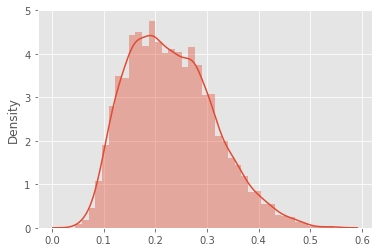

In [157]:
sns.distplot(XGB_predict)

In [158]:
roc_auc_score(y_test, XGB_predict)

0.6690276883451385

In [159]:
from scipy.spatial.distance import euclidean
from sklearn.metrics import roc_curve
FPR, TPR, thresholds = roc_curve(y_test, XGB_predict)
amin = np.array([euclidean([0.,1.], [FP, TP]) for FP, TP in zip(FPR, TPR)]).argmin()
thresh = thresholds[amin]
thresh

0.23194466084017057

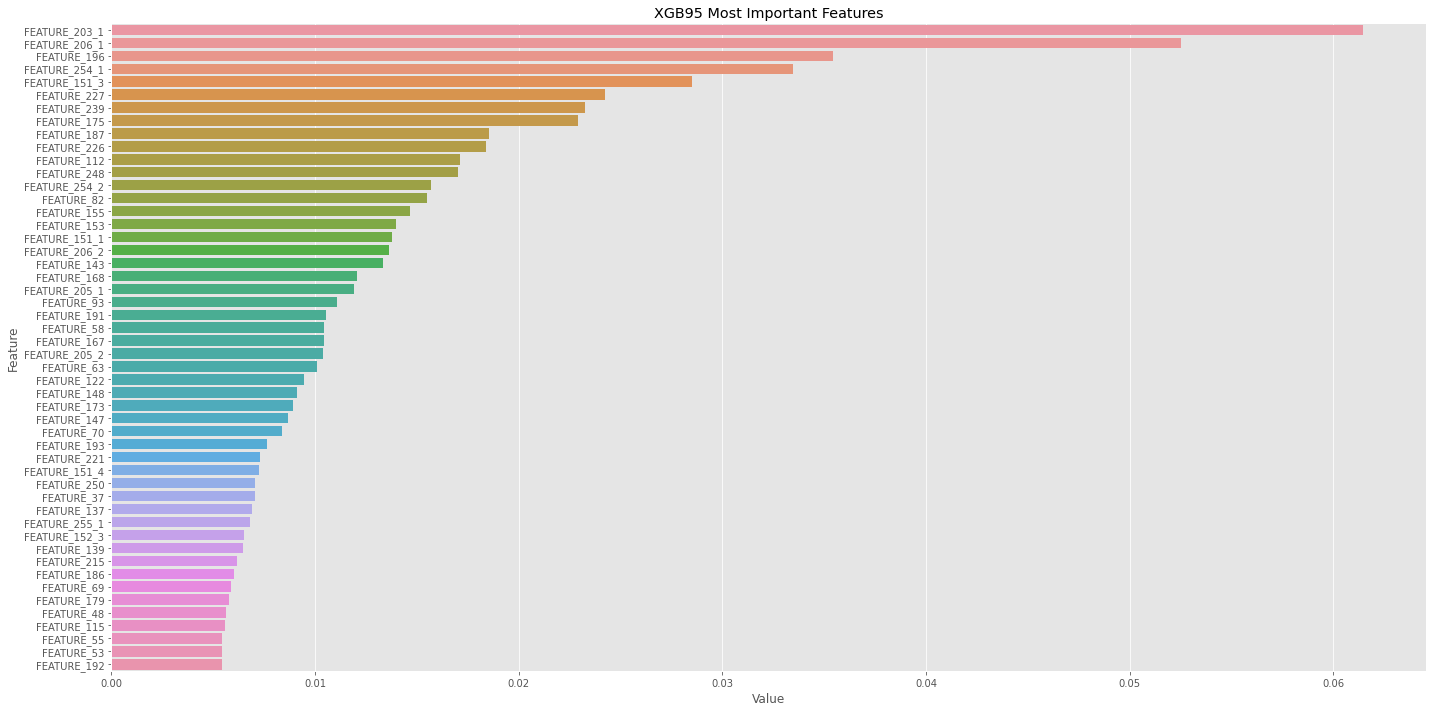

In [160]:
  feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_,X_train_part.columns)), columns=['Value','Feature'])
  plt.figure(figsize=(20, 10))
  sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False).iloc[:50])
  plt.title('XGB95 Most Important Features')
  plt.tight_layout()
  plt.show()

In [161]:
result = model.predict_proba(df_test_part)[:, 1]

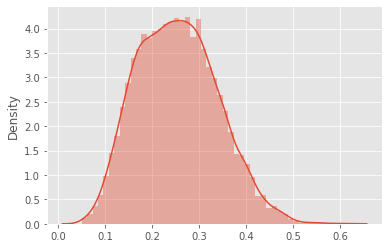

In [162]:
sns.distplot(result)

In [163]:
report = pd.DataFrame({'ID' : df_test.ID.values, 'TARGET' : result})

In [164]:
report.to_csv("submit.csv", index=False)

# Подбор параметров

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc

learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 1]
train_results = []
test_results = []
for eta in learning_rates:
    print(eta)
    model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, max_depth=5, max_features='sqrt', min_samples_split=0.3, min_samples_leaf=1)
    model.fit(x, y)
    train_pred = model.predict_proba(x)[:, 1]
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = model.predict_proba(X_test_new)[:, 1]
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test_new, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label='Train AUC')
line2, = plt.plot(learning_rates, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('learning rate')
plt.show()